In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap

def plot_ergebnis(X, y, clf):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5, stratify=y) 

    plot_step = 0.02
    x_min, x_max = data['X1'].min() - 1, data['X1'].max() + 1
    y_min, y_max = data['X2'].min() - 1, data['X2'].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    
    #Evaluierung anhand einer 10-fold Kreuzvalidierung
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Durchschnittliche  Accuracy:', scores.mean())

    clf.fit(X_train, y_train)
    
    fig, axs = plt.subplots(1,2, figsize = (15, 4))
    #Plot Konfussionsmatrix
    plot_confusion_matrix(clf, X_test, y_test, ax = axs[0])
    
    #Plot Entscheidungsfunktion und Datenpunkte + Vorhersagen
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=ListedColormap(['red','grey']))
    plt.scatter( data['X1'],  data['X2'], alpha=0.25, c=data['y'], cmap=ListedColormap(['red','grey']))
    y_pred=clf.predict(X_test)
    plt.scatter(X_test['X1'], X_test['X2'], c = y_pred,marker='x', s=10, cmap=ListedColormap(['red','grey']))
    plt.title('SVM (C = %f)' % clf.C)

def plot_confidence(data, clf):
    data['Confidence of SVM (C = %d)' % clf.C] = clf.decision_function(data[['X1', 'X2']])

    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(data['X1'], data['X2'], s=50, c=data['Confidence of SVM (C = %d)' % clf.C], cmap='RdGy')
    ax.set_title('SVM (C = %f) Decision Confidence' % clf.C)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Grid Search

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

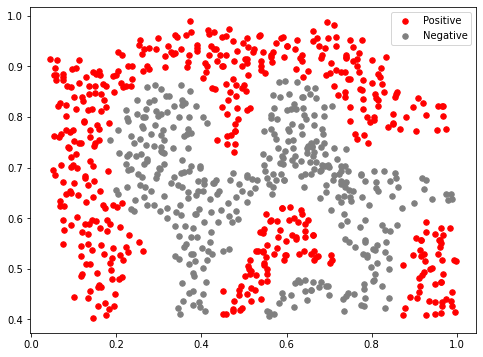

In [5]:
data = pd.read_csv('artificial_data_svm_2.csv')
X = data[['X1', 'X2']]
y = data['y']
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(positive['X1'], positive['X2'], s=30,  label='Positive', color = "red")
ax.scatter(negative['X1'], negative['X2'], s=30,  label='Negative', color = "grey")
ax.legend()
plt.show()

In [8]:
params = {  'kernel':['line','rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': [1, 50, 100, 150, 1000, 10000]
            }

In [9]:
svc = SVC(probability=True)

In [10]:
grid_searcher = GridSearchCV(svc, params, cv=10)

In [11]:
grid_searcher.fit(X,y)

/Users/dle/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/sv

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1, 50, 100, 150, 1000, 10000],
                         'kernel': ['line', 'rbf']})

In [13]:
grid_searcher.cv_results_

{'mean_fit_time': array([0.00209782, 0.11561947, 0.00144029, 0.11122656, 0.00251343,
        0.11065648, 0.00158379, 0.11000454, 0.0014308 , 0.13550198,
        0.00148406, 0.13285871, 0.00149748, 0.11164937, 0.0014663 ,
        0.07334497, 0.00145428, 0.07559605, 0.00141015, 0.08035548,
        0.00144131, 0.12097199, 0.00150349, 0.12822649, 0.00144622,
        0.0959702 , 0.00287368, 0.03747551, 0.00137324, 0.030919  ,
        0.001369  , 0.03394656, 0.00141451, 0.13642592, 0.00135999,
        0.14290638, 0.00142024, 0.08021529, 0.00129499, 0.02336211,
        0.00140777, 0.02219577, 0.00171127, 0.02602718, 0.0016253 ,
        0.13804481, 0.00134127, 0.14754651]),
 'std_fit_time': array([4.05798009e-04, 3.49791117e-03, 2.60147557e-04, 3.08611587e-03,
        5.73620351e-04, 2.65564943e-03, 2.90256509e-04, 1.25403042e-03,
        2.08541851e-04, 2.34802749e-02, 1.89562928e-04, 1.03169934e-02,
        2.01539851e-04, 1.47568130e-03, 3.10333895e-04, 3.64509305e-03,
        3.90335575e-0

In [18]:
df_gs = pd.DataFrame(grid_searcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params','mean_fit_time','mean_test_score','rank_test_score']]

In [19]:
df_gs

,params,mean_fit_time,mean_test_score,rank_test_score
39,"{'C': 10, 'gamma': 50, 'kernel': 'rbf'}",0.023362,0.930286,1
43,"{'C': 10, 'gamma': 150, 'kernel': 'rbf'}",0.026027,0.930259,2
41,"{'C': 10, 'gamma': 100, 'kernel': 'rbf'}",0.022196,0.929096,3
45,"{'C': 10, 'gamma': 1000, 'kernel': 'rbf'}",0.138045,0.925662,4
33,"{'C': 1, 'gamma': 1000, 'kernel': 'rbf'}",0.136426,0.925662,4
31,"{'C': 1, 'gamma': 150, 'kernel': 'rbf'}",0.033947,0.916319,6
29,"{'C': 1, 'gamma': 100, 'kernel': 'rbf'}",0.030919,0.912817,7
27,"{'C': 1, 'gamma': 50, 'kernel': 'rbf'}",0.037476,0.855881,8
19,"{'C': 0.1, 'gamma': 150, 'kernel': 'rbf'}",0.080355,0.852406,9
17,"{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}",0.075596,0.836153,10


In [20]:
grid_searcher.best_params_

{'C': 10, 'gamma': 50, 'kernel': 'rbf'}

In [21]:
grid_searcher.best_estimator_

SVC(C=10, gamma=50, probability=True)

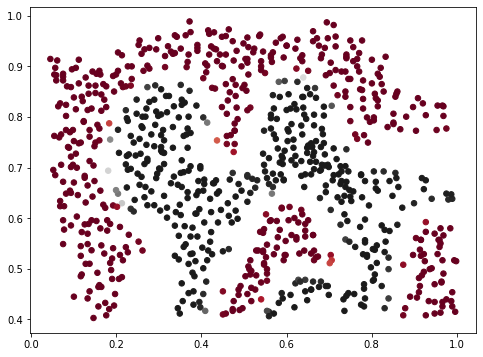

In [25]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X['X1'], X['X2'], s=30, c=grid_searcher.best_estimator_.predict_proba(X)[:,0], cmap='RdGy')
plt.show()

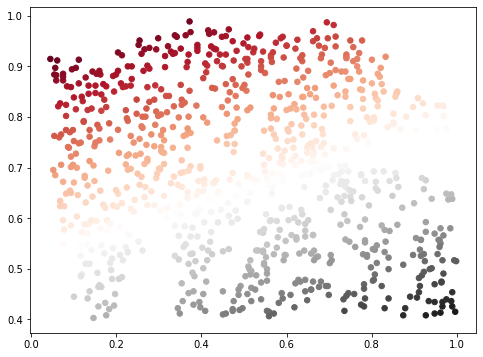

In [29]:
#the last rank
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X['X1'], X['X2'], s=30, c=SVC(C=1, gamma=1, kernel='linear',probability=True).fit(X,y).predict_proba(X)[:,0], cmap='RdGy')
plt.show()

#c is the color parameter for the plot

# Execution time

In [31]:
import time

In [33]:
start = time.time()
grid_searcher = GridSearchCV(svc, params, cv=10, n_jobs=-1)
grid_searcher.fit(X,y)
end = time.time()

print( end - start)

15.034932136535645


/Users/dle/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/sv

# Random Search

In [47]:
params = {  'kernel':['line','rbf'],
            'C': [0.01, 0.1, 1, 10],
            'gamma': [1, 50, 100, 150, 1000, 10000]
            }

#we can use the random number generator to produce the random hyperamter in a range


In [42]:
from sklearn.model_selection import RandomizedSearchCV

start = time.time()
random_searcher = RandomizedSearchCV(svc, params, cv=10)
random_searcher.fit(X,y)
end = time.time()

print( end - start)

6.410246133804321


/Users/dle/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Users/dle/.local/lib/python3.8/site-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/

In [43]:
random_searcher.n_iter

10

In [45]:
df_gs = pd.DataFrame(random_searcher.cv_results_).sort_values('mean_test_score', ascending=False)[['params','mean_fit_time','mean_test_score','rank_test_score']]
df_gs

,params,mean_fit_time,mean_test_score,rank_test_score
6,"{'kernel': 'rbf', 'gamma': 50, 'C': 10}",0.025044,0.930286,1
5,"{'kernel': 'rbf', 'gamma': 100, 'C': 10}",0.023772,0.929096,2
7,"{'kernel': 'rbf', 'gamma': 10000, 'C': 10}",0.152378,0.749693,3
0,"{'kernel': 'rbf', 'gamma': 10000, 'C': 0.1}",0.146748,0.556215,4
4,"{'kernel': 'rbf', 'gamma': 100, 'C': 0.01}",0.117556,0.556215,4
9,"{'kernel': 'rbf', 'gamma': 10000, 'C': 0.01}",0.126582,0.556215,4
1,"{'kernel': 'line', 'gamma': 10000, 'C': 0.01}",0.001609,NaN,7
2,"{'kernel': 'line', 'gamma': 100, 'C': 10}",0.001923,NaN,8
3,"{'kernel': 'line', 'gamma': 1, 'C': 0.1}",0.001845,NaN,9
8,"{'kernel': 'line', 'gamma': 100, 'C': 1}",0.001420,NaN,10
